# Harmonic noise

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib notebook

pi2 = np.pi*2

In [2]:
# Set style of plots
colwidth=3.5
figwidth=6
figheight=4.5
ticksize= 8 *figwidth/colwidth 
labelsize=10 *figwidth/colwidth
titlesize = 10 *figwidth/colwidth
annotatesize= ticksize*1
# mpl.style.use('classic')
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize})
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':labelsize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-3,3]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'image.cmap':'rainbow'})
mpl.rcParams.update({'axes.formatter.useoffset':True})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

# mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# To get sans-serif
mpl.rc('font', **{'sans-serif' : 'Arial','family' : 'sans-serif'})

# To use unicode
# params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
# params = {'text.usetex': True , 'mathtext.fontset': 'stixsans'}
# plt.rcParams.update(params)

# To be able to use SI units as micro (automatically upright)
plt.rc('text', usetex = True)
params = {'text.latex.preamble': [r'\usepackage{siunitx}', r'\usepackage{cmbright}']}
plt.rcParams.update(params)


# Many kicks


<IPython.core.display.Javascript object>


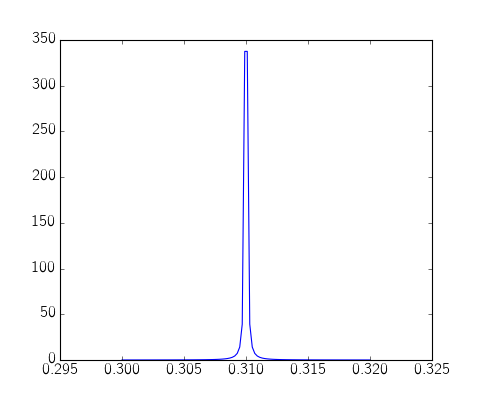

In [3]:
mu = np.linspace(0.3,0.32,100)*pi2
k = 1
g = .001
muk = 0.31 * pi2
tau = 2/g
tau =7000
f = k**2/tau / (1/tau**2 + (muk-mu)**2)
plt.figure()
plt.plot(mu/pi2,f)


In [518]:
## Beam and machine parameters
a = 1e-3
q0 = 0.302
epsh = 1e-4 * 4
epsw= 1e-4 * 10
Jn = 1
qn =  ( q0 + Jn*a )
tmax = 20000
turns = np.arange(tmax)


def rotate(x,p,mu):
    temp = x
    x = np.cos(mu)*x   +np.sin(mu)*p
    p =-np.sin(mu)*temp+np.cos(mu)*p
    return x,p

def nsin(t):
    return  np.sin(pi2*qn*t + 0.2 * np.pi)


# dj = 10-3

# t = 1/(2*a*dj)
# m = np.sqrt(10/2)*epsh/ (np.pi*a*dj)

# print(t,m)
np.random.randn(3)

array([-1.34425043,  0.31916109,  1.32337039])

In [519]:
## Distribution
dist = 3
if dist ==1:
    N = 20
    x =+np.linspace(-5 *0,1*5 ,N)
    x[x==0]=1e-1
    p = np.zeros_like(x)
    phis = np.zeros_like(x)
elif dist ==2 :
    N = 20
    phis = np.linspace(0,2*np.pi,N,endpoint=False)
    J = 1.4
    R = np.sqrt(2*J)
    x = R * np.cos(phis)
    p = R * np.sin(phis)    
elif dist ==3:
    NJ = 51
    Nphi=25
    N = NJ*Nphi
    J1d = np.linspace(0,2,NJ)
    phi1d= np.linspace(0,2*np.pi,Nphi,endpoint=False)
    J0,phis = np.meshgrid(J1d,phi1d)
    J=J0.reshape(N,) ; phis=phis.reshape(N,)
    R = np.sqrt(2*J)
    x = R * np.cos(phis)
    p = R * np.sin(phis)    

Js = .5*(x**2+p**2)
mu0 = np.pi*2*(q0+a*Js)

## Simulation
if dist<=3:
    save = np.zeros((2,tmax,N))
else:
    save = np.zeros((2,tmax,Ns[0],Ns[1]))
for t in turns:
    mu = np.pi*2*(q0+a*(x**2+p**2)*.5)
    x,p = rotate(x,p,mu)
    
    if epsh >0: p+= epsh*nsin(t)
    if epsw >0: p+= np.random.normal(0,1,N)*epsw
    save[:,t] = [x,p]
    

In [515]:
# print(J0)

<IPython.core.display.Javascript object>


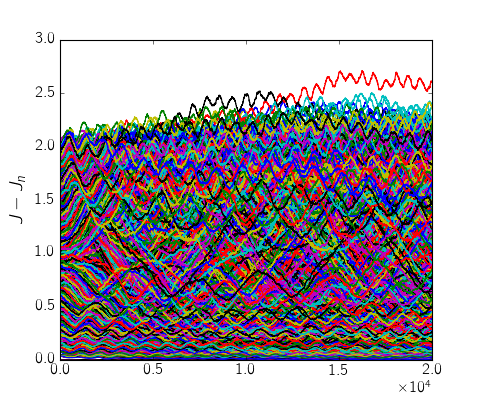

<IPython.core.display.Javascript object>


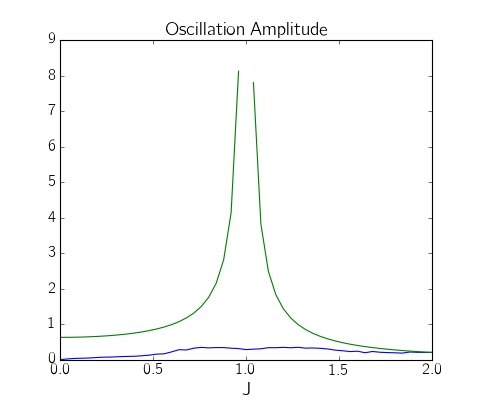

(51,) (25, 51)


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in true_divide


<IPython.core.display.Javascript object>


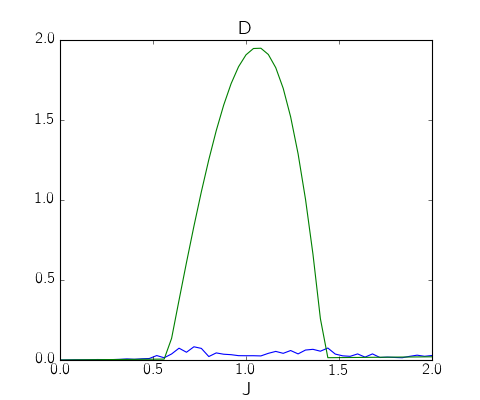

(25, 51) (25, 51)
[0.00000000e+00 2.04124145e-05 3.43294524e-05 4.65302430e-05
 5.77350269e-05 6.82530216e-05 7.82542290e-05 8.78451744e-05
 9.70983543e-05 1.06066017e-04 1.14787442e-04 1.23293134e-04
 1.31607401e-04 1.39750025e-04 1.47737384e-04 1.55583244e-04
 1.63299316e-04 1.70895674e-04 1.78381067e-04 1.85763156e-04
 1.93048698e-04 2.00243695e-04 2.07353509e-04 2.14382957e-04
 2.21336384e-04 2.28217732e-04 2.35030590e-04 2.41778235e-04
 2.48463674e-04 2.55089673e-04 2.61658785e-04 2.68173370e-04
 2.74635619e-04 2.81047570e-04 2.87411120e-04 2.93728043e-04
 3.00000000e-04 3.06228546e-04 3.12415143e-04 3.18561168e-04
 3.24667915e-04]


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:50: RuntimeWarning: divide by zero encountered in true_divide
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:51: RuntimeWarning: divide by zero encountered in true_divide
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in multiply


In [520]:
# plt.plot(save[0],save[1])
plt.figure()
J = .5*(save[0]**2 + save[1]**2)
# plt.gca().set_color_cycle([cm.jet(i) for i in J[0]/np.max(J[0])])
plt.plot(turns,(J-J[0]*0))
# plt.plot(turns,(J-(qn-q0)/a))
plt.ylabel(r'$J-J_n$')

# print('Predicted time = %.2e'%(5*R**2/epsw**2))

if dist<3:
    plt.figure()
    plt.plot(J[0],np.max(np.abs(J-J[0]*0),axis=0)/J[0])
    plt.title('Max relative change of J')

    plt.figure()
    plt.plot(phis,np.max(np.abs(J-J[0])/J[0],axis=0),label='max spread')
    plt.plot(phis,np.max(J,axis=0)-np.min(J,axis=0),label='spread')
    plt.plot(phis,.4*np.cos(phis/2)**2,label=r'$cos^2$')
    plt.legend(loc=0)
    plt.title('Max change as function of phase')

if dist==3:
    J2D = J.reshape(tmax,Nphi,NJ)
    
    
    plt.figure()
    plt.xlabel('J')
    plt.title('Oscillation Amplitude')
    spread = (np.max(J2D,axis=0)-np.min(J2D,axis=0))*.5
    print(J1d.shape,spread.shape)
    plt.plot(J1d,np.mean(spread,axis=0))
    plt.plot(J1d, epsh/np.sqrt((2*np.pi*a)**2*(J1d**2-Jn**2)**2)*10 )

    
    plt.figure()
    plt.title('D')
    plt.xlabel('J')
    spread = (np.max(J2D,axis=0)-np.min(J2D,axis=0))*.5
#     spread = np.max(np.abs(J2D-J2D[0]),axis=0)*1
    spread = (J2D[-1]-J2D[0])
    print(J0.shape,spread.shape)
#     plt.plot(J0,spread**2/2)
    plt.plot(J1d,np.mean(spread**2/2,axis=0))
    
    wJ = np.sqrt(epsh*np.sqrt(Jn)/a)/1.5 /2
    Dharmt = epsh**1.5*J1d**.75/a**.5 *3/8   / [np.sqrt(1+((J1d**2-3**2)/wJ)**2), 
                                                1+((J1d-Jn)/wJ)**4,
                                                1+((J1d**2-Jn**2)/wJ**2)**2,
                                                1/np.max([1-((J1d-Jn)/(wJ*2))**2,np.zeros(NJ)],axis=0)][3]
    Dharm0 = J1d/8 *epsh**2/a / np.abs(J1d-Jn) *0
    Dharm0[np.abs(J1d-Jn)<.5]=0
    Dwhite = J1d*epsw**2/2   
    
    print(amp)
    plt.plot(J1d, (Dharmt + Dwhite +Dharm0 )*tmax )
    
    
    # per step
#     steps = np.diff(J2D,axis=0).reshape(((tmax-1)*N,1))
#     plt.hist(J2D[:-1].reshape((tmax-1)*N),weights=steps)

#     plt.figure()
#     plt.plot(turns,Js[:,-1,:])

<IPython.core.display.Javascript object>


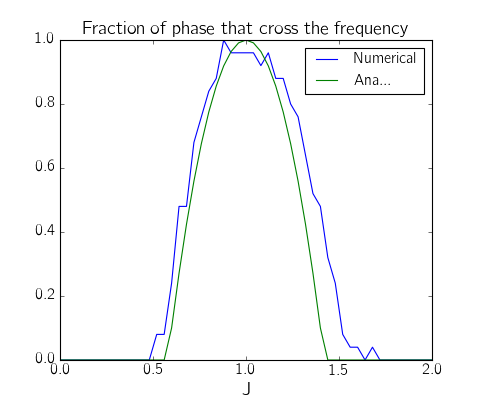

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  2  6 12 12 17 19 21 22 25 24
 24 24 24 23 24 22 22 20 19 16 13 12  8  6  2  1  1  0  1  0  0  0  0  0
  0  0  0]


In [521]:
    plt.figure()
    plt.title('Fraction of phase that cross the frequency')
    plt.xlabel('J')
    below = J1d<Jn
    above = J1d>=Jn
    crosscount=np.sum(np.logical_and(np.any(J2D>Jn,axis=0),np.any(J2D<Jn,axis=0)),axis=0)
    print(crosscount)
    plt.plot(J1d,crosscount/Nphi,label='Numerical')
    plt.plot(J1d,[1/np.sqrt(1+((J1d**2-Jn**2)/wJ)**2), 
                  1/(1+(np.abs(J1d-Jn)/wJ)**3),
                  1/(1+((J1d**2-Jn**2)/wJ**0)**2),
                  np.max([1-((J1d-Jn)/(wJ*2))**2,np.zeros(NJ)],axis=0)][3],label='Ana...')
    plt.legend(loc=0)
        

In [523]:
np.max([[1,-2,3],np.zeros(3)],axis=0)

array([1., 0., 3.])